# Redes Neuronales y Aprendizaje Profundo

### Máster Universitario en Inteligencia Artificial

*Universidad Internacional de La Rioja (UNIR)*  
*Profesor: Pablo Negre*



## **TIPOS DE ENTRENAMIENTOS Y CAPAS FINALES SEGÚN LOS PROBLEMAS A TRATAR**

### **PROBLEMA DE REGRESIÓN**


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


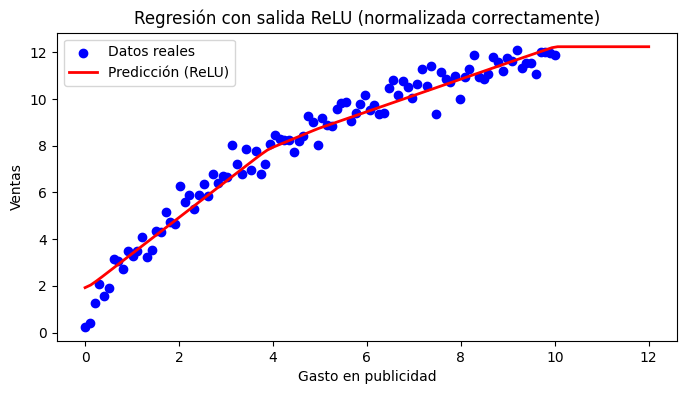

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Datos sintéticos: gasto en publicidad vs ventas
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)   # gasto (miles de $)
y = 5 * np.log1p(X) + np.random.randn(100, 1) * 0.5  # ventas (miles de unidades)
y = np.maximum(y, 0)  # ventas no negativas

# Escalamos X e y a [0,1] para evitar saturación de ReLU
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Modelo con ReLU en todas las capas (incluida la salida)
modelo = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(16, activation='relu'),
    Dense(1, activation='relu')  # salida ReLU — sí o sí 😎
])

modelo.compile(optimizer='adam', loss='mse')

# Entrenar
hist = modelo.fit(X_scaled, y_scaled, epochs=400, verbose=0)

# Predicciones (escaladas)
X_test = np.linspace(0, 12, 100).reshape(-1, 1)
X_test_scaled = scaler_X.transform(np.clip(X_test, 0, 10))  # limitar al rango de entrenamiento
y_pred_scaled = modelo.predict(X_test_scaled)

# Desescalar para obtener las unidades reales
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Graficar resultados
plt.figure(figsize=(8,4))
plt.scatter(X, y, label="Datos reales", color='blue')
plt.plot(X_test, y_pred, 'r', linewidth=2, label="Predicción (ReLU)")
plt.title("Regresión con salida ReLU (normalizada correctamente)")
plt.xlabel("Gasto en publicidad")
plt.ylabel("Ventas")
plt.legend()
plt.show()


### **PROBLEMA DE CLASIFICACIÓN BINARIA**


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Datos de entrenamiento: 12665 muestras (0 y 1)


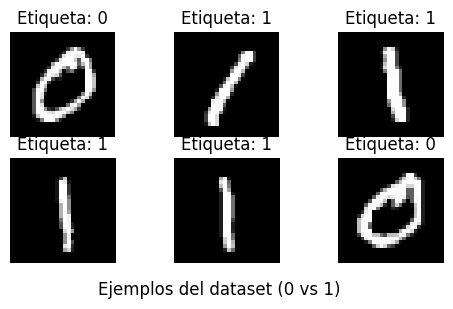

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9646 - loss: 0.0959 - val_accuracy: 0.9992 - val_loss: 0.0017
Epoch 2/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0032 - val_accuracy: 0.9988 - val_loss: 0.0038
Epoch 3/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9996 - val_loss: 9.7849e-04
Epoch 4/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0018 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 5/5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9992 - val_loss: 0.0012

Precisión en test: 99.95%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


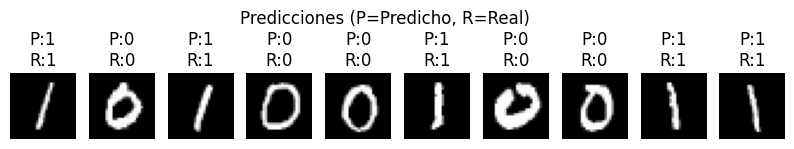

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar MNIST y filtrar solo dígitos 0 y 1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

mask_train = (y_train == 0) | (y_train == 1)
mask_test = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# Normalizar a [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Datos de entrenamiento: {x_train.shape[0]} muestras (0 y 1)")

# 2. Mostrar algunas imágenes
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Ejemplos del dataset (0 vs 1)", y=0.05)
plt.show()

# 3. Crear modelo denso
modelo_binario = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

modelo_binario.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# 4️. Entrenar
hist = modelo_binario.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)

# 5. Evaluar y predecir
loss, acc = modelo_binario.evaluate(x_test, y_test, verbose=0)
print(f"\nPrecisión en test: {acc*100:.2f}%")

# 6️. Mostrar algunas predicciones
preds = modelo_binario.predict(x_test[:10])
pred_classes = (preds > 0.5).astype(int).flatten()

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"P:{pred_classes[i]}\nR:{y_test[i]}")
    plt.axis('off')
plt.suptitle("Predicciones (P=Predicho, R=Real)")
plt.show()

**PROBLEMA DE CLASIFICACIÓN MULTICLASE (EJEMPLO CON 3 CLASES)**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Clases existentes: ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7709 - loss: 0.6619 - val_accuracy: 0.8355 - val_loss: 0.4319
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8599 - loss: 0.3809 - val_accuracy: 0.8657 - val_loss: 0.3615
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3412 - val_accuracy: 0.8698 - val_loss: 0.3594
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8849 - loss: 0.3134 - val_accuracy: 0.8812 - val_loss: 0.3262
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8878 - loss: 0.2981 - val_accuracy: 0.8840 - val_loss: 0.3217
Epoch 6/10
1688/1688 ━━━━━━━━━

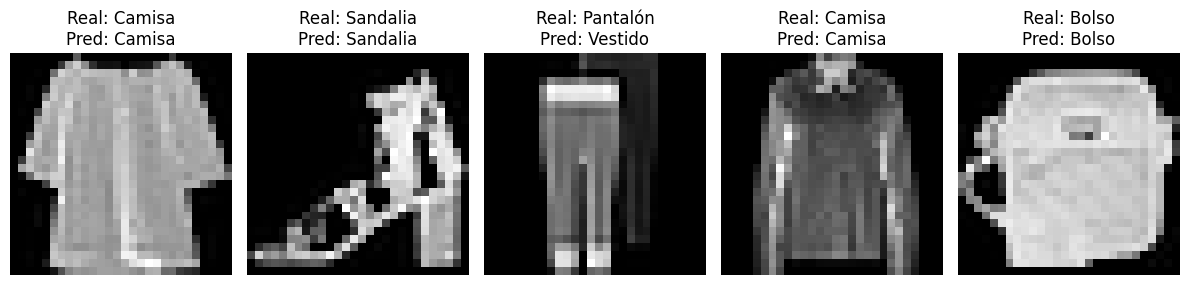

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# ------------------------------------------------------------
# 1. Cargar el dataset Fashion MNIST
# ------------------------------------------------------------
# Este dataset ya viene incluido en TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Nombres de las clases (para mostrar luego)
clases = [
    'Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
    'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín'
]

print("Clases existentes:", clases)

# Normalizamos los valores de píxeles (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertimos las etiquetas a one-hot
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# ------------------------------------------------------------
# 2️. Definición del modelo de red neuronal
# ------------------------------------------------------------
modelo = Sequential([
    Flatten(input_shape=(28, 28)),   # aplana las imágenes 28x28 → vector 784
    Dense(128, activation='relu'),   # capa oculta con 128 neuronas
    Dense(64, activation='relu'),    # capa oculta con 64 neuronas
    Dense(10, activation='softmax')  # capa de salida (10 clases)
])

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------------------------------------
# 3️. Entrenamiento del modelo
# ------------------------------------------------------------
historia = modelo.fit(X_train, y_train_cat, epochs=10, validation_split=0.1, verbose=1)

# ------------------------------------------------------------
# 4️. Evaluación del modelo
# ------------------------------------------------------------
loss, acc = modelo.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Accuracy en test: {acc:.4f}")

# ------------------------------------------------------------
# 5️. Predicción de algunas imágenes y visualización
# ------------------------------------------------------------
num_muestras = 5
indices = np.random.choice(len(X_test), num_muestras)

plt.figure(figsize=(12, 3))
for i, idx in enumerate(indices):
    img = X_test[idx]
    etiqueta_real = clases[y_test[idx]]
    pred = modelo.predict(img.reshape(1, 28, 28))
    etiqueta_pred = clases[np.argmax(pred)]

    plt.subplot(1, num_muestras, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Real: {etiqueta_real}\nPred: {etiqueta_pred}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**CLASIFICACIÓN MULTIETIQUETA (varias etiquetas posibles a la vez)**

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.IUJDIS_5.0.0/voc-test.tfrecord*...:   0%|          | 0…

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.IUJDIS_5.0.0/voc-train.tfrecord*...:   0%|          | …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/voc/2007/incomplete.IUJDIS_5.0.0/voc-validation.tfrecord*...:   0%|       …

Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/5.0.0. Subsequent calls will reuse this data.
Clases disponibles: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - binary_accuracy: 0.8883 - loss: 0.3806
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - binary_accuracy: 0.9216 - loss: 0.2671
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - binary_accuracy: 0.9218 - loss: 0.2536
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - binary_accuracy: 0.9223 - loss: 0.2465
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - binary_accuracy: 0.9228 - loss: 0.2393
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - binary_accuracy: 0.9240 - loss: 0.2332
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - binary_accuracy: 0.9251 - loss: 0.2277
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - binary_accuracy: 0.9260 - loss: 0.2207
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - binary_accuracy: 0.9274 - loss: 0.2149
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - binary_accuracy: 0.9276 - loss: 0.2084

✅ Accuracy promedio por etiqueta: 0.9181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


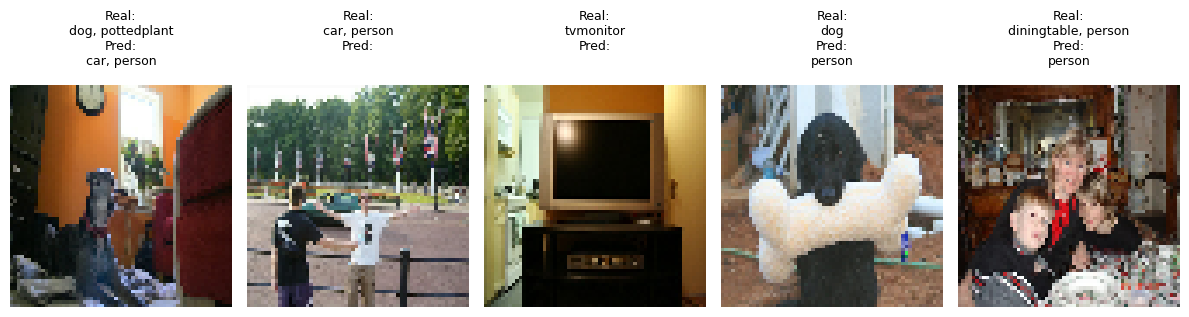

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# ------------------------------------------------------------
# 1️. Cargar el dataset Pascal VOC 2007 (multietiqueta real)
# ------------------------------------------------------------
# NOTA: sin 'as_supervised=True', ya que devuelve diccionarios {'image', 'labels'}
dataset, info = tfds.load('voc/2007', with_info=True)
train_ds, test_ds = dataset['train'], dataset['test']

# Nombres de las clases
num_classes = info.features['labels'].num_classes
class_names = info.features['labels'].names
print("Clases disponibles:", class_names)

# ------------------------------------------------------------
# 2️. Preprocesamiento
# ------------------------------------------------------------
def preprocess(example):
    image = example['image']
    labels = example['labels']

    # Redimensionamos imágenes a tamaño fijo y normalizamos (0–1)
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32) / 255.0

    # Convertimos la lista de etiquetas en un vector binario (multi-hot)
    label_vec = tf.reduce_sum(tf.one_hot(labels, depth=num_classes), axis=0)
    return image, label_vec

train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# ------------------------------------------------------------
# 3️. Definición del modelo (versión simple)
# ------------------------------------------------------------
modelo = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='sigmoid')  # multilabel → sigmoid
])

# En problemas multietiqueta (multi-label), cada muestra puede tener varias etiquetas verdaderas.
# La métrica 'accuracy' tradicional de Keras compara todo el vector de etiquetas a la vez,
# por lo que solo cuenta como correcto si TODAS las etiquetas coinciden exactamente.
# Eso produce valores de accuracy muy bajos (~0.1–0.3) incluso cuando el modelo acierta la mayoría.
#
# Por ello, usamos 'BinaryAccuracy', que calcula los aciertos de forma independiente
# para cada etiqueta (por ejemplo, acierta si predice bien "persona" aunque falle "perro").
# Esta métrica refleja mucho mejor el rendimiento real del modelo multietiqueta.
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)]
)

# ------------------------------------------------------------
# 4️. Entrenamiento
# ------------------------------------------------------------
modelo.fit(train_ds, epochs=10, verbose=1)

# ------------------------------------------------------------
# 5️. Evaluación
# ------------------------------------------------------------
loss, acc = modelo.evaluate(test_ds, verbose=0)
print(f"\n✅ Accuracy promedio por etiqueta: {acc:.4f}")

# ------------------------------------------------------------
# 6️. Predicción y visualización de resultados
# ------------------------------------------------------------
for batch in test_ds.take(1):
    imgs, labels = batch
    preds = modelo.predict(imgs)

    plt.figure(figsize=(12, 4))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(imgs[i])
        plt.axis('off')

        reales = [class_names[j] for j, v in enumerate(labels[i].numpy()) if v == 1]
        predichas = [class_names[j] for j, v in enumerate(preds[i]) if v > 0.5]

        plt.title(f"Real:\n{', '.join(reales)}\nPred:\n{', '.join(predichas)}",
                  fontsize=9, pad=15)  # ← pad agrega espacio vertical

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # ← empuja todo un poco hacia arriba, deja espacio abajo
    plt.show()
    break
